## Importing required packages

In [ ]:
import pandas as pd 
import numpy as np
from numpy import *
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.api import acf, pacf, ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import arma_order_select_ic
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Importing data

In [ ]:
data = pd.read_csv('train.csv',parse_dates=['Date'])
data = data.sort_values('Date')
data.set_index('Date', inplace=True)
data.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-05,20,44,10130.02,False,25.92,2.784,NaN,NaN,NaN,NaN,NaN,204.247194,8.187,A,203742
2010-02-05,14,31,3798.40,False,27.31,2.784,NaN,NaN,NaN,NaN,NaN,181.871190,8.992,A,200898
2010-02-05,12,94,4.96,False,49.47,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,13.975,B,112238
2010-02-05,41,40,47546.05,False,30.27,2.580,NaN,NaN,NaN,NaN,NaN,189.381697,7.541,A,196321
2010-02-05,28,4,33057.95,False,49.47,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,13.975,A,206302


In [ ]:
#Splitting the data in train and testing
train_data = data[data.index.year < 2012]
test_data = data[data.index.year >= 2012]

## Correlation Matrix and Linear Regression

[]

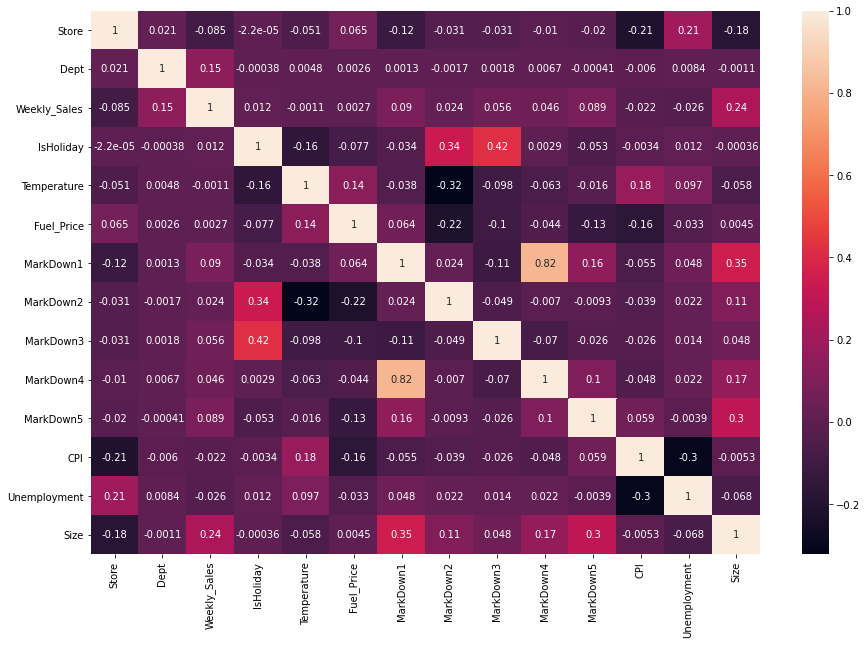

In [ ]:
#Compute the correlation matrix
corr = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

In [ ]:
#Checking for null values
train_data.isna().sum()

Store                0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       181620
MarkDown2       184024
MarkDown3       182009
MarkDown4       183429
MarkDown5       181422
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [ ]:
#Filling NA values in Markdown 1-5 column with 0
train_data=train_data.fillna(0)
test_data=test_data.fillna(0)

In [ ]:
#Removing negative values
train_data = train_data[train_data['Weekly_Sales'] >= 0]
test_data = test_data[test_data['Weekly_Sales'] >= 0]

In [ ]:
train_data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,196880.000000,196880.000000,196880.000000,196880.000000,196880.000000,196880.000000,196880.000000,196880.000000,196880.000000,196880.000000,196880.000000,196880.000000,196880.000000
mean,22.180475,44.175533,16120.870438,58.964350,3.209400,361.704681,530.893323,636.151004,108.427482,519.976846,169.501519,8.239871,136856.666116
std,12.779488,30.444716,22858.711341,18.935886,0.439105,1913.891114,5199.010323,6544.406994,683.874780,2701.827047,38.469629,1.871804,60960.720779
min,1.000000,1.000000,0.000000,-2.060000,2.472000,0.000000,0.000000,-0.870000,0.000000,0.000000,126.064000,4.420000,34875.000000
25%,11.000000,18.000000,2171.557500,45.310000,2.806000,0.000000,0.000000,0.000000,0.000000,0.000000,131.901968,7.287000,93638.000000
50%,22.000000,37.000000,7770.780000,60.480000,3.127000,0.000000,0.000000,0.000000,0.000000,0.000000,182.077469,8.058000,140167.000000
75%,33.000000,72.000000,20422.865000,73.380000,3.594000,0.000000,0.000000,0.000000,0.000000,0.000000,211.100385,8.684000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.211000,34348.140000,104519.540000,141630.610000,20834.370000,37581.270000,223.249677,14.313000,219622.000000


In [ ]:
train_data.dtypes

Store             int64
Dept              int64
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [ ]:
# Converting Categorical Variable 'Type' into Numerical Variables.
type_mapping = {"A": 1, "B": 2, "C": 3}

train_data['Type_Cate'] = train_data.Type.apply(lambda x: type_mapping[x])

In [ ]:
test_data['Type_Cate'] = test_data.Type.apply(lambda x: type_mapping[x])

In [ ]:
features = ['Temperature', 'Fuel_Price', 'MarkDown1','MarkDown2','MarkDown3','MarkDown4', 
            'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_Cate']
target = ['Weekly_Sales']

#Here, the method used will be a multiple linear regression 

LR_model = LinearRegression()

#We define our training set, which will help us fit the model

X_train = train_data[features]
y_train = train_data[target]

#We fit the model thanks to the training data

LR_model.fit(X_train, y_train)

#We apply the model on the test data to predict the unknow weekly sales

X_test = test_data[features]
y_test = test_data[target]
y_pred_LR = LR_model.predict(X_test)

In [ ]:
#Creating evaluation function
def display_evaluation_simple_slr(model, X_train, y_train, X_test, y_test, y_pred, raw_data, features, target):

  root_mse_test = np.sqrt(mean_squared_error(y_test, y_pred))
  r_sq_train = model.score(X_train, y_train)
  r_sq_test = model.score(X_test, y_test)

  print(f'Intercept:      {model.intercept_}')
  print(f'Coefficients:   {model.coef_}')

  print(f'Root MSE test:  {root_mse_test}')
  print(f'R^2 train:      {r_sq_train}')
  print(f'R^2 test:       {r_sq_test}')

In [ ]:
display_evaluation_simple_slr(LR_model, X_train, y_train, X_test, y_test, y_pred_LR,data, features, target)

Intercept:      [3998.21352468]
Coefficients:   [[ 2.44706976e+01 -4.37327887e+02  7.68882469e-02  5.79868465e-03
   1.11237568e-01 -5.42808204e-02  1.43602015e-01 -1.73736062e+01
  -2.33409291e+02  1.03892674e-01  1.61403431e+03]]
Root MSE test:  21546.78180728425
R^2 train:      0.061803010376617507
R^2 test:       0.062317291275915


In [ ]:
train_data.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-05,20,44,10130.02,False,25.92,2.784,0.0,0.0,0.0,0.0,0.0,204.247194,8.187,A,203742
2010-02-05,14,31,3798.40,False,27.31,2.784,0.0,0.0,0.0,0.0,0.0,181.871190,8.992,A,200898
2010-02-05,12,94,4.96,False,49.47,2.962,0.0,0.0,0.0,0.0,0.0,126.442065,13.975,B,112238
2010-02-05,41,40,47546.05,False,30.27,2.580,0.0,0.0,0.0,0.0,0.0,189.381697,7.541,A,196321
2010-02-05,28,4,33057.95,False,49.47,2.962,0.0,0.0,0.0,0.0,0.0,126.442065,13.975,A,206302


## ARIMA Model

In [ ]:
#Taking out only Weekly sales for univariate time series forecasting
train_data_ts = train_data[['Weekly_Sales']]
test_data_ts = test_data[['Weekly_Sales']]

In [ ]:
#Grouping by date to calulate the total sales of all the stores/dept
train_data_ts = train_data_ts.groupby(['Date']).sum()
test_data_ts = test_data_ts.groupby(['Date']).sum()

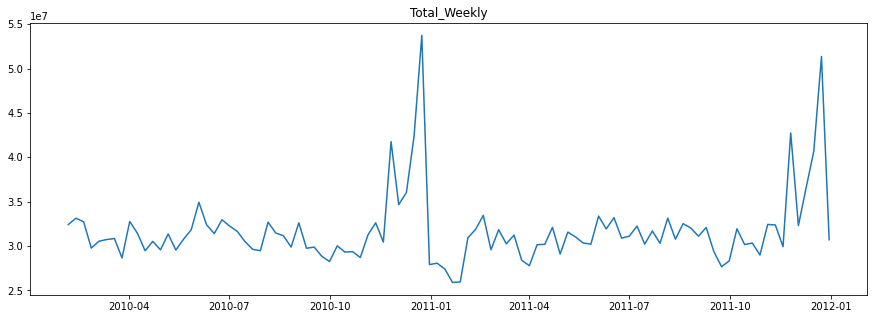

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(train_data_ts['Weekly_Sales'])
plt.title('Total_Weekly')

plt.show()

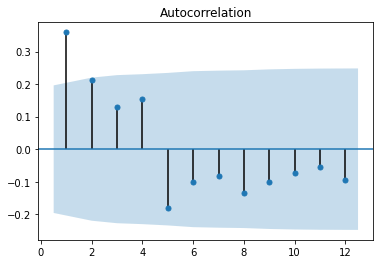

In [ ]:
#Plotting ACF
plot_acf(train_data_ts['Weekly_Sales'], lags=12, zero=False)
plt.show()

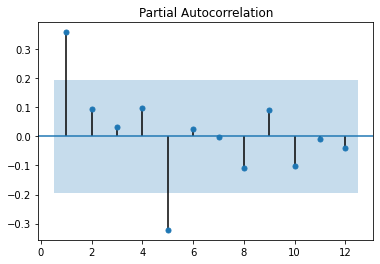

In [ ]:
#Plotting PCF
plot_pacf(train_data_ts['Weekly_Sales'], lags=12, zero=False, method='ywmle')

plt.show()

In [ ]:
#Fitting ARIMA model
results = ARIMA(train_data_ts['Weekly_Sales'], order=(2,1,1)).fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.Weekly_Sales   No. Observations:                   99
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1643.884
Method:                       css-mle   S.D. of innovations        3899640.168
Date:                Tue, 23 Jun 2020   AIC                           3297.768
Time:                        22:38:21   BIC                           3310.744
Sample:                    02-12-2010   HQIC                          3303.018
                         - 12-30-2011                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.673e+04        nan        nan        nan         nan         nan
ar.L1.D.Weekly_Sales     0.3240      0.108      3.011      0.003       0.113       0.535
ar.L2.D.Week

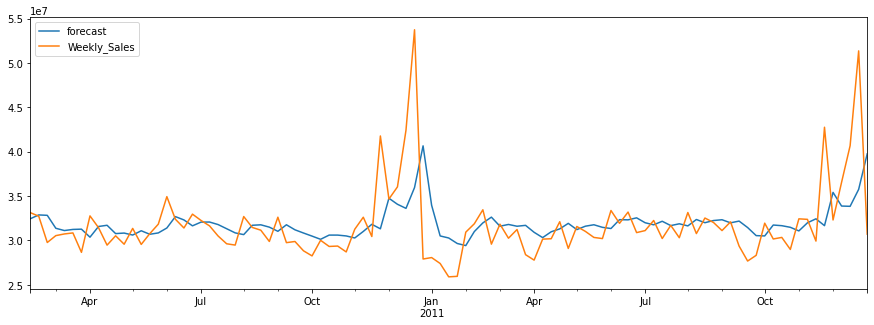

In [ ]:
# Predicting on train data
fig, ax = plt.subplots(figsize=(15, 5))
results.plot_predict(ax=ax)
plt.show()

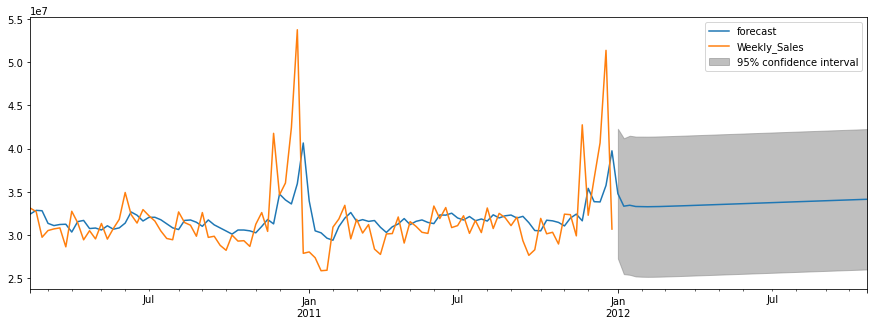

In [ ]:
#Extending to out of sample predictions
fig, ax = plt.subplots(figsize=(15, 5))

results.plot_predict(end='2012-10-26', ax=ax)

plt.show()

In [ ]:
#Calculating accuracy of the model
start = '2012-01-06'
end = '2012-10-26'

y_true = test_data_ts[start:end]['Weekly_Sales']
y_pred = results.predict(start, end)

#Mean Absolute percentage error
print(np.mean(np.abs((y_true - y_pred) / y_true)))

0.9974335946342592


# SARIMA Model 

In [ ]:
time_series = train_data_ts['Weekly_Sales']

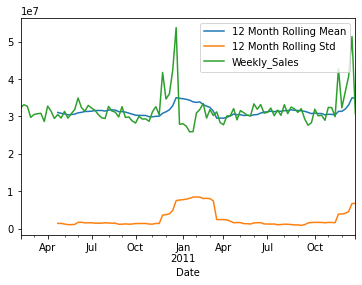

In [ ]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.rolling(12).std().plot(label='12 Month Rolling Std')
time_series.plot()
plt.legend()

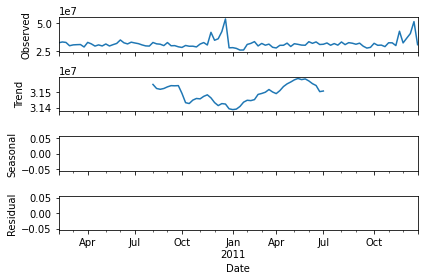

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_1 = seasonal_decompose(time_series)
fig_1 = decomp_1.plot()

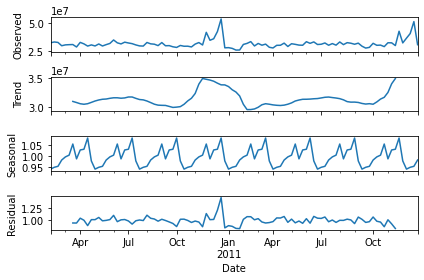

In [ ]:
decomp_2 = seasonal_decompose(train_data_ts['Weekly_Sales'], model='multiplicative', freq=12)
fig_2 = decomp_2.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(time_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.235582
p-value: 0.000573
Critical Values:
	1%: -3.501
	5%: -2.892
	10%: -2.583


Since p-value is less than 0.05, the data is stationary

## Checking Autocorrelation

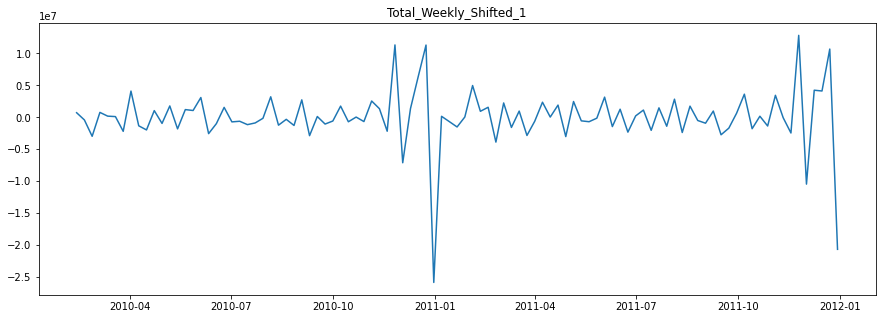

In [ ]:
train_data_ts_diff1 = train_data_ts.diff(1)
train_data_ts_diff1.dropna(inplace=True)
plt.figure(figsize=(15, 5))
plt.title('Total_Weekly_Shifted_1')
plt.plot(train_data_ts_diff1)

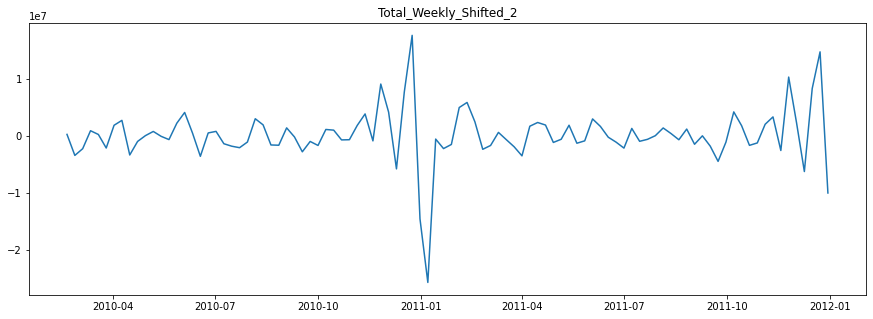

In [ ]:
train_data_ts_diff2 = train_data_ts.diff(2)
train_data_ts_diff2.dropna(inplace=True)
plt.figure(figsize=(15, 5))
plt.title('Total_Weekly_Shifted_2')
plt.plot(train_data_ts_diff2)

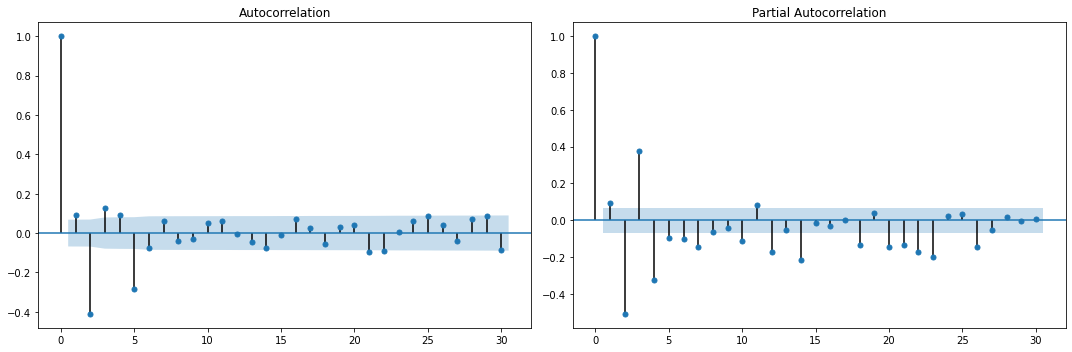

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.set_figheight(5)
smt.graphics.plot_acf(train_data_ts_diff2, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(train_data_ts_diff2, lags=30, ax=axes[1], alpha=0.5,method='ols')
plt.tight_layout()

## Checking Autocorrelation with Log

In [ ]:
train_data_ts_log = np.log10(train_data_ts)

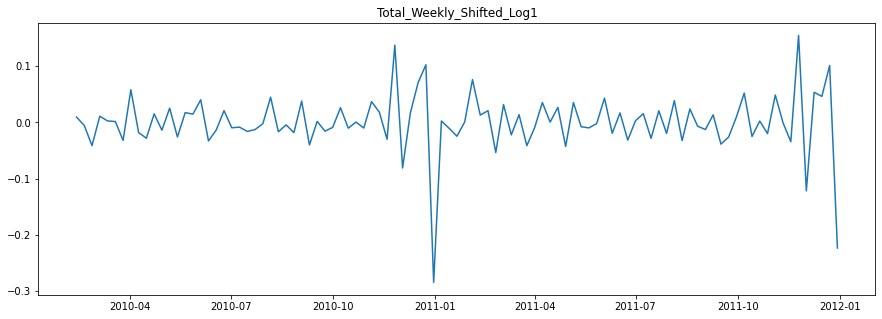

In [ ]:
train_data_ts_log_diff1 = train_data_ts_log.diff(1)
train_data_ts_log_diff1.dropna(inplace=True)
plt.figure(figsize=(15, 5))
plt.title('Total_Weekly_Shifted_Log1')
plt.plot(train_data_ts_log_diff1)

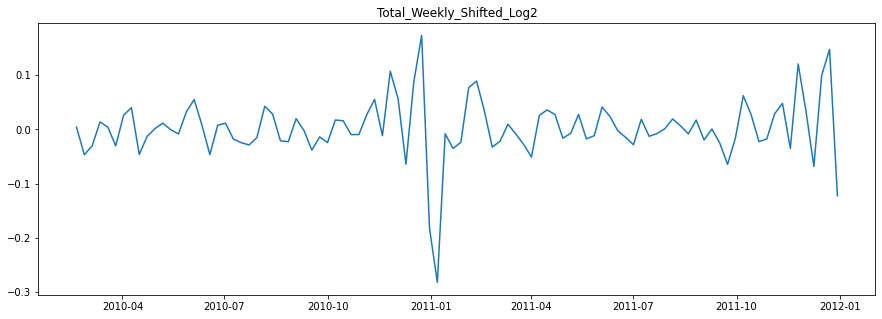

In [ ]:
train_data_ts_log_diff2 = train_data_ts_log.diff(2)
train_data_ts_log_diff2.dropna(inplace=True)
plt.figure(figsize=(15, 5))
plt.title('Total_Weekly_Shifted_Log2')
plt.plot(train_data_ts_log_diff2)

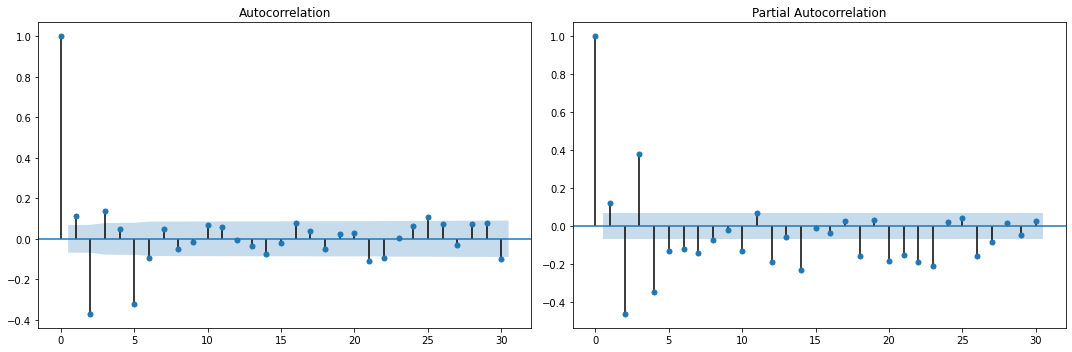

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.set_figheight(5)
smt.graphics.plot_acf(train_data_ts_log_diff2, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(train_data_ts_log_diff2, lags=30, ax=axes[1], alpha=0.5,method='ols')
plt.tight_layout()

## Modelling

In [ ]:
model = sm.tsa.statespace.SARIMAX(train_data_ts_diff2, order = (1,0,1), seasonal_order= (1,0,0,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
Sresults = model.fit()
print(Sresults.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       Weekly_Sales   No. Observations:                   98
Model:             SARIMAX(1, 0, 1)x(1, 0, 0, 12)   Log Likelihood               -1423.011
Date:                            Tue, 23 Jun 2020   AIC                           2854.022
Time:                                    22:11:45   BIC                           2863.792
Sample:                                02-19-2010   HQIC                          2857.952
                                     - 12-30-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4266      0.091     -4.711      0.000      -0.604      -0.249
ma.L1          0.9770      0.050   

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 2)
d = range(0,2)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,2)
P = Q = range(0, 2) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [ ]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_data_ts,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 model - AIC:2472.2326302352635


In [ ]:
best_model = sm.tsa.statespace.SARIMAX(train_data_ts['Weekly_Sales'],
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 1, 1, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()
print (best_results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       Weekly_Sales   No. Observations:                  100
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1232.116
Date:                            Tue, 23 Jun 2020   AIC                           2472.233
Time:                                    22:12:34   BIC                           2481.394
Sample:                                02-05-2010   HQIC                          2475.884
                                     - 12-30-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6047      0.062     -9.772      0.000      -0.726      -0.483
ar.S.L12      -0.3454      0.228   

In [ ]:
pred_dynamic = best_results.get_prediction(full_results=True)

In [ ]:
pred_dynamic.predicted_mean

2010-02-05    0.000000e+00
2010-02-12    3.241219e+07
2010-02-19    3.269817e+07
2010-02-26    3.271123e+07
2010-03-05    3.154676e+07
                  ...     
2011-12-02    3.500009e+07
2011-12-09    3.199320e+07
2011-12-16    3.374254e+07
2011-12-23    3.711342e+07
2011-12-30    4.326212e+07
Freq: W-FRI, Length: 100, dtype: float64

In [ ]:
train_data_ts['Forecast_data'] = pred_dynamic.predicted_mean
train_data_ts.dropna(inplace=True)
train_data_ts.head()

,Weekly_Sales,Forecast_data
Date,,
2010-02-05,32412189.61,0.000000e+00
2010-02-12,33135624.24,3.241219e+07
2010-02-19,32731216.57,3.269817e+07
2010-02-26,29765485.51,3.271123e+07
2010-03-05,30540210.29,3.154676e+07


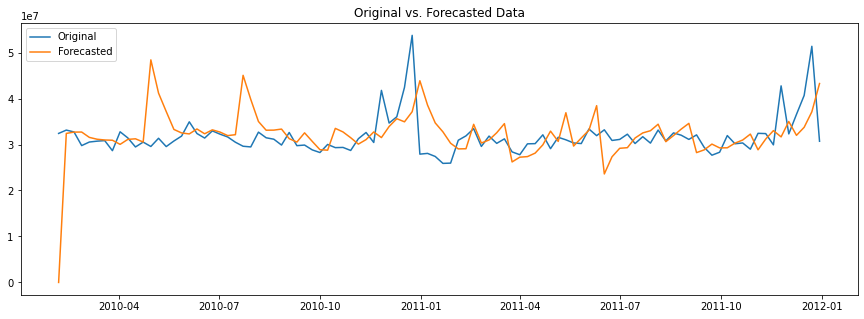

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(train_data_ts['Weekly_Sales'], label='Original')
plt.plot(train_data_ts['Forecast_data'], label='Forecasted')
plt.title('Original vs. Forecasted Data')
plt.legend()
plt.show()

## Modelling for Log

In [ ]:
Smodel = sm.tsa.statespace.SARIMAX(train_data_ts_log_diff2, order = (1,0,1), seasonal_order= (1,0,0,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
SAresults = Smodel.fit()
print(SAresults.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       Weekly_Sales   No. Observations:                   98
Model:             SARIMAX(1, 0, 1)x(1, 0, 0, 12)   Log Likelihood                 129.633
Date:                            Tue, 23 Jun 2020   AIC                           -251.266
Time:                                    22:14:25   BIC                           -241.495
Sample:                                02-19-2010   HQIC                          -247.336
                                     - 12-30-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3988      0.081     -4.945      0.000      -0.557      -0.241
ma.L1          1.0000     60.192   

In [ ]:
best_model_1 = sm.tsa.statespace.SARIMAX(train_data_ts_log,
                                      order=(1, 1, 1),
                                      seasonal_order=(0, 0, 0, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results_1 = best_model_1.fit()
print (best_results_1.summary())

                           Statespace Model Results                           
Dep. Variable:           Weekly_Sales   No. Observations:                  100
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 160.460
Date:                Tue, 23 Jun 2020   AIC                           -314.920
Time:                        22:14:43   BIC                           -307.196
Sample:                    02-05-2010   HQIC                          -311.797
                         - 12-30-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3927      0.085      4.628      0.000       0.226       0.559
ma.L1         -1.0000    113.056     -0.009      0.993    -222.586     220.586
sigma2         0.0021      0.233      0.009      0.9

In [ ]:
forecast_values = best_results_1.forecast(steps=12)

forecast = pd.DataFrame({'LnForecast': forecast_values,
                         'Forecast': np.exp(forecast_values)})

## Test Accuracy of Model

In [305]:
start = '2012-01-06'
end = '2012-10-26'

y_true = test_data_ts[start:end]['Weekly_Sales']
y_pred = best_results.predict(start, end)

#Mean Absolute percentage error
print(np.mean(np.abs((y_true - y_pred) / y_true)))
print(mean_absolute_error(y_true, y_pred))
print(mean_squared_error(y_true, y_pred))

0.4161652988360358
12856209.805542855
184642494632532.66


## Test for Accuracy for Log

In [306]:
start = '2012-01-06'
end = '2012-10-26'

y_true = test_data_ts[start:end]['Weekly_Sales']
y_pred = best_results_1.predict(start, end)

#Mean Absolute percentage error
print(np.mean(np.abs((y_true - y_pred) / y_true)))
print(mean_absolute_error(y_true, y_pred))
print(mean_squared_error(y_true, y_pred))

0.9999997586183464
31179458.496486347
975750687081731.1
